In [387]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import math
import collections

In [388]:
train = pd.read_csv('train3.csv')
test = pd.read_csv('test1.csv')
# submission = pd.read_csv(r'../input/spaceship-titanic/sample_submission.csv')
All = pd.concat([train, test], sort=False).reset_index(drop=True)
All

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [389]:
# def familyid(df):
#     All['family_id1']=All['PassengerId']
#     All['family_id2']=All['PassengerId']
#     for i in range(df.shape[0]):
#         All['family_id1'][i]=All['PassengerId'][i][:4]
#         All['family_id2'][i]=All['PassengerId'][i][5:7]
#     return All    
# familyid(All)        

In [390]:
All.CryoSleep=All.CryoSleep.astype('float')
All.VIP = All.VIP.astype('float') 
tmp = All.CryoSleep == 1

In [391]:
All.RoomService[tmp] = 0                               
All.FoodCourt[tmp] = 0
All.ShoppingMall[tmp] = 0
All.Spa[tmp] = 0
All.VRDeck[tmp] = 0

In [392]:
tmp = (All.Age < 13)
All.RoomService[tmp].fillna(0,inplace=True)
All.FoodCourt[tmp].fillna(0,inplace=True)
All.ShoppingMall[tmp].fillna(0,inplace=True)
All.Spa[tmp].fillna(0,inplace=True)
All.VRDeck[tmp].fillna(0,inplace=True)

In [393]:
tmp.sum()  

1157

In [394]:
tmp =(All.RoomService.isna() | All.FoodCourt.isna() | All.ShoppingMall.isna() | All.Spa.isna() | All.VRDeck.isna())

# All["Incomplete"][tmp]=1

In [395]:
All.RoomService.fillna(0,inplace=True)
All.FoodCourt.fillna(0,inplace=True)
All.ShoppingMall.fillna(0,inplace=True)
All.Spa.fillna(0,inplace=True)
All.VRDeck.fillna(0,inplace=True)

In [396]:
All["Money"] = (All.RoomService + All.FoodCourt + All.ShoppingMall + 
                    All.Spa + All.VRDeck)

In [397]:
tmp = (All.Money == 0) & (All.Age >= 13) & (pd.isna(All.CryoSleep))
All.CryoSleep[tmp] = 1 
print("Fixed sleeping adults:" , tmp.sum())

Fixed sleeping adults: 104


In [398]:
tmp = (All.Money > 0) & (pd.isna(All.CryoSleep))
All.CryoSleep[tmp] = 0
print("Fixed awake adults:   " , tmp.sum())

Fixed awake adults:    174


In [399]:
avg_child_age = All.Age[All.Age < 13].mean()
avg_adult_age = All.Age[All.Age >= 13].mean()

In [400]:
tmp = (All.Money == 0) & (All.CryoSleep == 0) & (pd.isna(All.Age))
All.Age[tmp] = avg_child_age
print("Fixed child age:      " , tmp.sum())

Fixed child age:       13


In [401]:
tmp = ((All.VIP == 1) | (All.Money > 0)) & (pd.isna(All.Age))
All.Age[tmp] = avg_adult_age
print("Fixed adult age:      " , tmp.sum())

Fixed adult age:       141


In [402]:
tmp = (All.Age < 18) & (pd.isna(All.VIP))
All.VIP[tmp] = 0
print("Fixed adolescent VIP: " , tmp.sum())

Fixed adolescent VIP:  54


In [403]:
tmp = (All.VIP == 1) & (All.CryoSleep == 0)
avg_VIP_spending = All.Money[tmp].mean()

In [404]:
tmp = (All.VIP == 0) & (All.CryoSleep == 0) & (All.Age > 18)
avg_nonVIP_spending = All.Money[tmp].mean()

In [405]:
tmp = (pd.isna(All.VIP)) & (All.Money > avg_VIP_spending)
All.VIP[tmp] = 1
print("Fixed adult VIP:      " , tmp.sum())

Fixed adult VIP:       23


In [406]:
tmp = (pd.isna(All.VIP))
All.VIP[tmp] = 0
print("Fixed adult nonVIP:   " , tmp.sum())

Fixed adult nonVIP:    219


In [407]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12938 non-null  float64
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12854 non-null  float64
 6   VIP           12970 non-null  float64
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  Money         12970 non-null  float64
dtypes: float64(9), object(6)
memory usage: 1.5+ MB


In [408]:
# Use first 4 digit of passenger ID as group ID
All["GroupID"] = All.PassengerId.str.slice(stop=4).astype('float')
groups = pd.get_dummies(All.GroupID).sum()
groups = pd.DataFrame(groups,columns=["noPassengers"])
groups["inGroup"] = (groups.noPassengers > 1).astype('float')
All["inGroup"] = All["GroupID"]
All.inGroup = All.inGroup.replace(groups.inGroup.index,groups.inGroup.values)
All

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Money,GroupID,inGroup
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1.0,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.000000,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,2.0,0.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.000000,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3.0,1.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.000000,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,3.0,1.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.000000,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1.0,G/1496/S,TRAPPIST-1e,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0.0,9266.0,1.0
12966,9269_01,Earth,0.0,NaN,TRAPPIST-1e,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1018.0,9269.0,0.0
12967,9271_01,Mars,1.0,D/296/P,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0.0,9271.0,0.0
12968,9273_01,Europa,0.0,D/297/P,NaN,31.206359,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,3203.0,9273.0,0.0


In [409]:
groups = pd.DataFrame(groups,columns=["noPassengers"])
groups["inGroup"] = (groups.noPassengers > 1).astype('float')
All["inGroup"] = All["GroupID"]
All.inGroup = All.inGroup.replace(groups.inGroup.index,groups.inGroup.values)
All.head(60)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Money,GroupID,inGroup
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1.0,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.000000,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,2.0,0.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.000000,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3.0,1.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.000000,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,3.0,1.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.000000,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,4.0,0.0
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.000000,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,774.0,5.0,0.0
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.000000,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1584.0,6.0,1.0
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0.0,6.0,1.0
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.000000,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1018.0,7.0,0.0
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0.0,8.0,1.0


In [410]:
groups["HomePlanet"] = np.NaN
groups["Cabin"] = np.NaN
groups["Destination"] = np.NaN
groups.head(65)

,noPassengers,inGroup,HomePlanet,Cabin,Destination
1.0,1,0.0,NaN,NaN,NaN
2.0,1,0.0,NaN,NaN,NaN
3.0,2,1.0,NaN,NaN,NaN
4.0,1,0.0,NaN,NaN,NaN
5.0,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...
61.0,1,0.0,NaN,NaN,NaN
62.0,1,0.0,NaN,NaN,NaN
63.0,1,0.0,NaN,NaN,NaN
64.0,2,1.0,NaN,NaN,NaN


In [411]:
GroupID = All.GroupID == 64.0
for y in All.index[GroupID]:
    print(y)

58
59


In [412]:
for x in groups.index:                                              # Iterate through groups
    if groups.noPassengers[x] > 1:                                  # Multiple passengers ?
        GroupID = All.GroupID == x                              # Get indices in dataset
        for y in All.index[GroupID]:                            # Iterate through passengers
            if pd.notna(All.HomePlanet[y]):                     # Find HomePlanet
                groups.HomePlanet[x] = All.HomePlanet[y]
            if pd.notna(All.Cabin[y]):                          # Find Cabin
                groups.Cabin[x] = All.Cabin[y]
            if pd.notna(All.Destination[y]):                    # Find Destination
                groups.Destination[x] = All.Destination[y]                

In [413]:
groups

,noPassengers,inGroup,HomePlanet,Cabin,Destination
1.0,1,0.0,NaN,NaN,NaN
2.0,1,0.0,NaN,NaN,NaN
3.0,2,1.0,Europa,A/0/S,TRAPPIST-1e
4.0,1,0.0,NaN,NaN,NaN
5.0,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...
9276.0,1,0.0,NaN,NaN,NaN
9277.0,1,0.0,NaN,NaN,NaN
9278.0,1,0.0,NaN,NaN,NaN
9279.0,1,0.0,NaN,NaN,NaN


In [414]:
# Replace missing HomePlanet with value from Groups
GroupID = All.GroupID.copy()
GroupID.replace(groups.HomePlanet.index, groups.HomePlanet.values, inplace=True)
tmp = (pd.isna(All.HomePlanet)) & (All.inGroup == 1)
All.HomePlanet[tmp] = GroupID[tmp]
print("Fixed HomePlanet:     " , tmp.sum())

Fixed HomePlanet:      133


In [415]:
# Replace missing Cabin with value from Groups
GroupID = All.GroupID.copy()
GroupID.replace(groups.Cabin.index, groups.Cabin.values, inplace=True)
tmp = (pd.isna(All.Cabin)) & (All.inGroup == 1)
All.Cabin[tmp] = GroupID[tmp]
print("Fixed Cabin:          " , tmp.sum())

Fixed Cabin:           139


In [416]:
# Replace missing Destination with value from Groups
GroupID = All.GroupID.copy()
GroupID.replace(groups.Destination.index, groups.Destination.values, inplace=True)
tmp = (pd.isna(All.Destination)) & (All.inGroup == 1)
All.Destination[tmp] = GroupID[tmp]
print("Fixed Destination:    " , tmp.sum())

Fixed Destination:     120


Added dummy cabin:     162


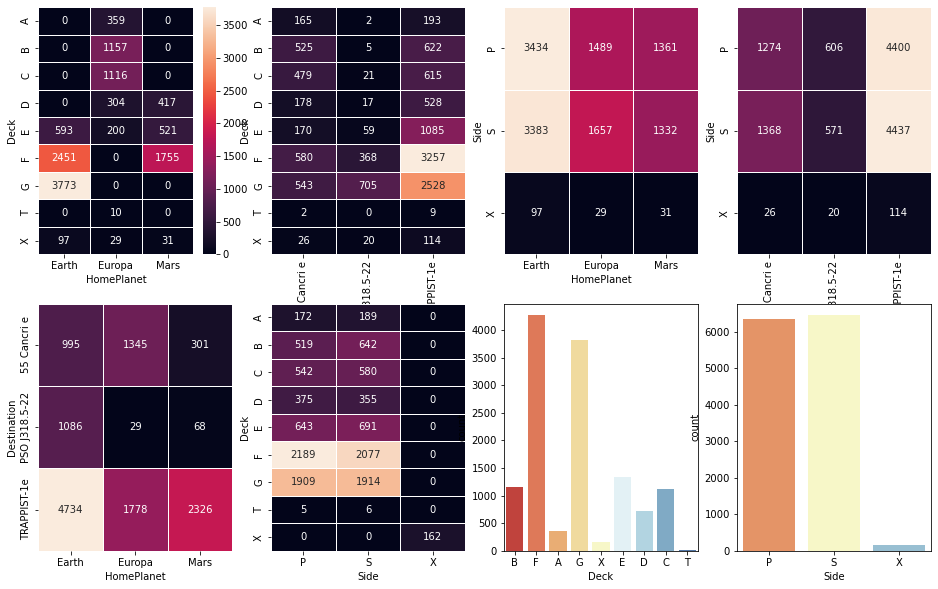

In [417]:
tmp = (pd.isna(All.Cabin))
All.Cabin[tmp] = 'X/-1/X'
print("Added dummy cabin:    " , tmp.sum())

All["Deck"] = All.Cabin.str.slice(stop=1)                           # Extract Cabin
All["Side"] = All.Cabin.str.slice(start=-1)                         # Extract Side
All["cNum"] = All.Cabin.str.slice(start=2,stop=-2).astype('float')  # Extract Cabin num.

fig = plt.figure(figsize = (16,10))

grp = All.groupby(['Deck','HomePlanet'])['HomePlanet'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,1)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=True)


grp = All.groupby(['Deck','Destination'])['Destination'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,2)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

grp = All.groupby(['Side','HomePlanet'])['HomePlanet'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,3)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

grp = All.groupby(['Side','Destination'])['Destination'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,4)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

grp = All.groupby(['Destination','HomePlanet'])['HomePlanet'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,5)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

grp = All.groupby(['Deck','Side'])['Side'].size()
grp = grp.unstack().fillna(0).astype('int')
sub = fig.add_subplot(2,4,6)
sns.heatmap(grp, annot=True, linewidths=.5, fmt='d', cbar=False)

sub = fig.add_subplot(2,4,7)
sns.countplot(data = All, x = 'Deck', palette = "RdYlBu" )

sub = fig.add_subplot(2,4,8)
sns.countplot(data = All, x = 'Side', palette = "RdYlBu" )

del fig, grp, sub, tmp


In [418]:
# People on Deck G must be from Earth
tmp = (pd.isna(All.HomePlanet)) & (All.Deck == "G")
All.HomePlanet[tmp] = "Earth"
print("Fixed Planet (Earth): " , tmp.sum())

# People going to PSO J318.5-22 must be from Earth
tmp = (pd.isna(All.HomePlanet)) & (All.Destination == "PSO J318.5-22")
All.HomePlanet[tmp] = "Earth"
print("Fixed Planet (Earth): " , tmp.sum())

# People from decks A, B, C or T must be from Europa
tmp = ((pd.isna(All.HomePlanet)) & ((All.Deck == "A") | (All.Deck == "B") | 
                                        (All.Deck == "C") | (All.Deck == "T")))
All.HomePlanet[tmp] = "Europa"
print("Fixed Planet (Europ.):" , tmp.sum())

# People from Earth are most likely in Deck G
tmp = (All.Deck == "X") & (All.HomePlanet == "Earth")
All.Deck[tmp] = "G"
print("Fixed Deck (Earth):   " , tmp.sum())

del tmp

Fixed Planet (Earth):  50
Fixed Planet (Earth):  6
Fixed Planet (Europ.): 13
Fixed Deck (Earth):    97


In [421]:
All['Side'].unique()
All['Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'X', 'T'], dtype=object)